In [ ]:
from google.colab import drive


drive.mount('/content/drive')


Mounted at /content/drive


# PreProcessing of data

In [ ]:
import pandas as pd


excel_path = "/content/drive/MyDrive/IITR/Satellite-project/Satellite-train.xlsx"


df = pd.read_excel(excel_path)


print("Total columns:", len(df.columns))


print("\nColumn names:")
for col in df.columns:
    print("-", col)


Total columns: 21

Column names:
- id
- date
- price
- bedrooms
- bathrooms
- sqft_living
- sqft_lot
- floors
- waterfront
- view
- condition
- grade
- sqft_above
- sqft_basement
- yr_built
- yr_renovated
- zipcode
- lat
- long
- sqft_living15
- sqft_lot15


In [ ]:
df.isna().sum()


,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
# Remove impossible values
df = df[df['bedrooms'] > 0]
df = df[df['bathrooms'] > 0]
df = df[df['sqft_living'] > 0]
df = df[df['price'] > 0]


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16198 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16198 non-null  int64  
 1   date           16198 non-null  object 
 2   price          16198 non-null  int64  
 3   bedrooms       16198 non-null  int64  
 4   bathrooms      16198 non-null  float64
 5   sqft_living    16198 non-null  int64  
 6   sqft_lot       16198 non-null  int64  
 7   floors         16198 non-null  float64
 8   waterfront     16198 non-null  int64  
 9   view           16198 non-null  int64  
 10  condition      16198 non-null  int64  
 11  grade          16198 non-null  int64  
 12  sqft_above     16198 non-null  int64  
 13  sqft_basement  16198 non-null  int64  
 14  yr_built       16198 non-null  int64  
 15  yr_renovated   16198 non-null  int64  
 16  zipcode        16198 non-null  int64  
 17  lat            16198 non-null  float64
 18  long       

# EDA

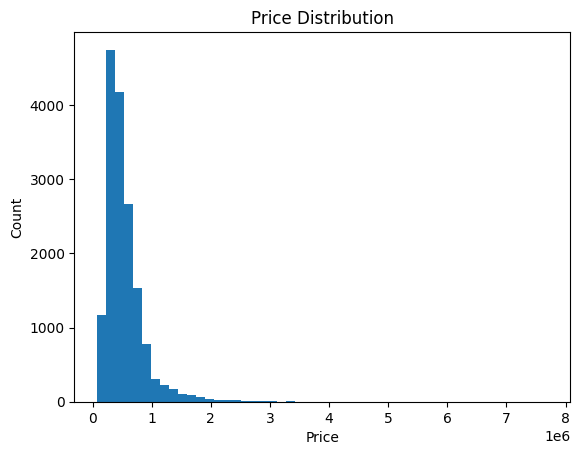

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['price'], bins=50)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price Distribution")
plt.show()


In [ ]:
df['price'].describe()


,price
count,1.620900e+04
mean,5.374703e+05
std,3.603036e+05
min,7.500000e+04
25%,3.200000e+05
50%,4.500000e+05
75%,6.400000e+05
max,7.700000e+06


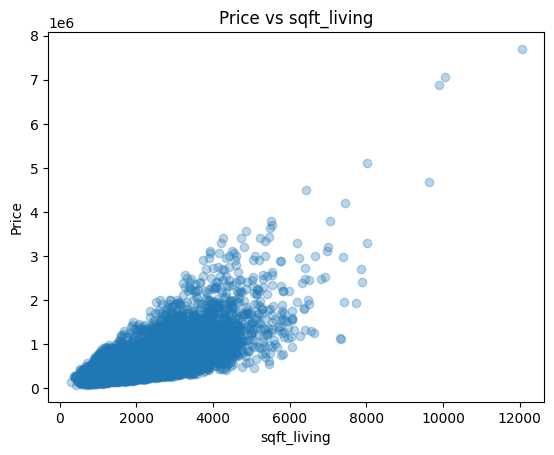

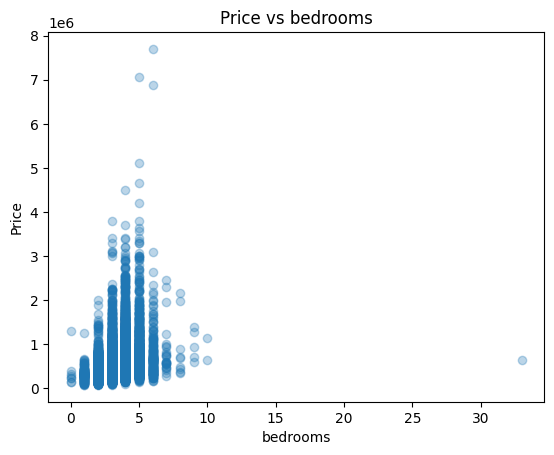

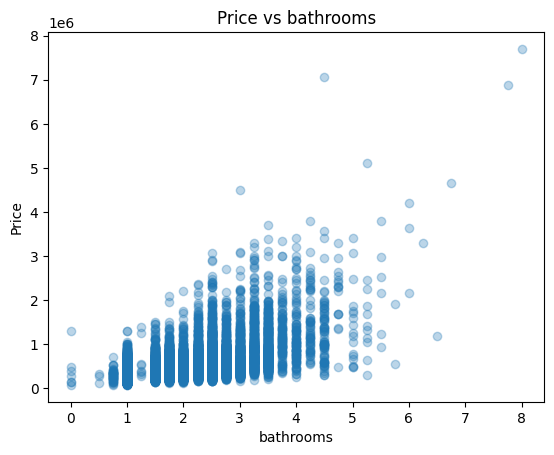

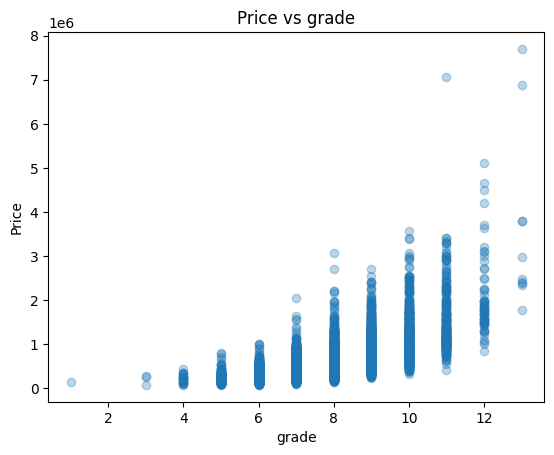

In [ ]:
features = ['sqft_living', 'bedrooms', 'bathrooms', 'grade']

for col in features:
    plt.figure()
    plt.scatter(df[col], df['price'], alpha=0.3)
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.title(f"Price vs {col}")
    plt.show()


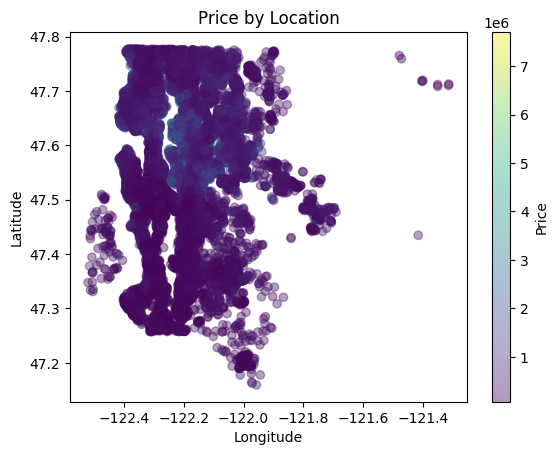

In [ ]:
plt.figure()
plt.scatter(df['long'], df['lat'], c=df['price'], cmap='viridis', alpha=0.4)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Price by Location")
plt.colorbar(label="Price")
plt.show()


# Feature engineering


In [ ]:
#  House age
df['house_age'] = 2025 - df['yr_built']

#  Renovation flag (binary)
df['is_renovated'] = (df['yr_renovated'] > 0).astype(int)

#  Total usable living area
df['total_sqft'] = df['sqft_above'] + df['sqft_basement']

#  Room density (space per bedroom)
df['room_density'] = df['sqft_living'] / (df['bedrooms'] + 1)


In [ ]:
df = df.drop(columns=['yr_built', 'yr_renovated'])


In [ ]:
y = df['price']
X = df.drop(columns=['price'])
